In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

# Import data

In [2]:
data_uri = "https://noaadata.apps.nsidc.org/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx"

In [3]:
df = pd.read_excel(data_uri, header=0)
df.head(10)

,Unnamed: 0,Unnamed: 1,1978,1979,1980,1981,1982,1983,1984,1985,...,2019,2020,2021,2022,2023,2024,2025,,1981-2010 mean,1981-2010 median
0,January,1,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,...,12.934,13.046,12.711,13.291,12.734,13.206,12.510,NaN,13.778,13.823
1,NaN,2,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,...,12.992,13.072,12.710,13.392,12.724,13.300,12.525,NaN,13.842,13.886
2,NaN,3,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,...,12.980,13.170,12.799,13.354,12.717,13.429,12.524,NaN,13.891,13.884
3,NaN,4,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,...,13.045,13.193,12.834,13.440,12.786,13.449,12.432,NaN,13.930,13.925
4,NaN,5,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,...,13.147,13.166,12.862,13.496,12.841,13.590,12.522,NaN,13.978,14.036
5,NaN,6,NaN,14.929,NaN,NaN,14.880,NaN,14.262,14.406,...,13.316,13.195,12.917,13.573,12.875,13.704,12.665,NaN,14.028,14.139
6,NaN,7,NaN,NaN,14.518,14.689,NaN,14.467,NaN,NaN,...,13.282,13.202,13.024,13.591,12.998,13.879,12.801,NaN,14.091,14.188
7,NaN,8,NaN,14.968,NaN,NaN,14.993,NaN,14.303,14.432,...,13.236,13.295,13.039,13.676,13.205,13.754,12.816,NaN,14.132,14.303
8,NaN,9,NaN,NaN,14.594,14.619,NaN,14.615,NaN,NaN,...,13.458,13.248,13.078,13.668,13.177,13.778,12.922,NaN,14.170,14.310
9,NaN,10,NaN,15.190,NaN,NaN,15.052,NaN,14.387,14.455,...,13.383,13.216,13.179,13.651,13.204,13.885,13.010,NaN,14.196,14.240


In [8]:
df.rename(columns={df.columns[0]:"Month", df.columns[1]:"Day"}, inplace=True)

In [9]:
df.head(5)

,Month,Day,1978,1979,1980,1981,1982,1983,1984,1985,...,2019,2020,2021,2022,2023,2024,2025,,1981-2010 mean,1981-2010 median
0,January,1,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,...,12.934,13.046,12.711,13.291,12.734,13.206,12.510,NaN,13.778,13.823
1,NaN,2,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,...,12.992,13.072,12.710,13.392,12.724,13.300,12.525,NaN,13.842,13.886
2,NaN,3,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,...,12.980,13.170,12.799,13.354,12.717,13.429,12.524,NaN,13.891,13.884
3,NaN,4,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,...,13.045,13.193,12.834,13.440,12.786,13.449,12.432,NaN,13.930,13.925
4,NaN,5,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,...,13.147,13.166,12.862,13.496,12.841,13.590,12.522,NaN,13.978,14.036


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             12 non-null     object 
 1   Day               366 non-null    int64  
 2   1978              34 non-null     float64
 3   1979              182 non-null    float64
 4   1980              183 non-null    float64
 5   1981              183 non-null    float64
 6   1982              182 non-null    float64
 7   1983              183 non-null    float64
 8   1984              183 non-null    float64
 9   1985              182 non-null    float64
 10  1986              183 non-null    float64
 11  1987              220 non-null    float64
 12  1988              354 non-null    float64
 13  1989              365 non-null    float64
 14  1990              365 non-null    float64
 15  1991              365 non-null    float64
 16  1992              366 non-null    float64
 1

In [13]:
df.Month.ffill(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             366 non-null    object 
 1   Day               366 non-null    int64  
 2   1978              34 non-null     float64
 3   1979              182 non-null    float64
 4   1980              183 non-null    float64
 5   1981              183 non-null    float64
 6   1982              182 non-null    float64
 7   1983              183 non-null    float64
 8   1984              183 non-null    float64
 9   1985              182 non-null    float64
 10  1986              183 non-null    float64
 11  1987              220 non-null    float64
 12  1988              354 non-null    float64
 13  1989              365 non-null    float64
 14  1990              365 non-null    float64
 15  1991              365 non-null    float64
 16  1992              366 non-null    float64
 1

# Filter

* Will be using data from 1989 the year from which daily measurements were made

In [15]:
df.columns

Index([           'Month',              'Day',               1978,
                     1979,               1980,               1981,
                     1982,               1983,               1984,
                     1985,               1986,               1987,
                     1988,               1989,               1990,
                     1991,               1992,               1993,
                     1994,               1995,               1996,
                     1997,               1998,               1999,
                     2000,               2001,               2002,
                     2003,               2004,               2005,
                     2006,               2007,               2008,
                     2009,               2010,               2011,
                     2012,               2013,               2014,
                     2015,               2016,               2017,
                     2018,               2019,               2

In [19]:
df.columns.tolist().index(1989)

13

In [20]:
df.columns.tolist().index(1978)

2

In [24]:
col_list = df.columns.tolist()
col_to_remove = col_list[2:13]
col_to_remove

[1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988]

In [25]:
col_to_include = [elem for elem in col_list if elem not in col_to_remove]
col_to_include

['Month',
 'Day',
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 ' ',
 '1981-2010 mean',
 '1981-2010 median']

In [39]:
df_filtered = df[col_to_include].copy()
df_filtered.head(5)

,Month,Day,1989,1990,1991,1992,1993,1994,1995,1996,...,2019,2020,2021,2022,2023,2024,2025,,1981-2010 mean,1981-2010 median
0,January,1,14.261,14.319,13.634,14.069,14.035,14.095,14.145,13.804,...,12.934,13.046,12.711,13.291,12.734,13.206,12.510,NaN,13.778,13.823
1,January,2,14.313,14.384,13.831,14.092,14.141,14.110,14.258,13.818,...,12.992,13.072,12.710,13.392,12.724,13.300,12.525,NaN,13.842,13.886
2,January,3,14.402,14.283,13.847,14.141,14.250,14.042,14.335,13.786,...,12.980,13.170,12.799,13.354,12.717,13.429,12.524,NaN,13.891,13.884
3,January,4,14.417,14.321,13.858,14.072,14.255,14.168,14.288,13.791,...,13.045,13.193,12.834,13.440,12.786,13.449,12.432,NaN,13.930,13.925
4,January,5,14.381,14.303,13.872,14.185,14.266,14.231,14.304,13.839,...,13.147,13.166,12.862,13.496,12.841,13.590,12.522,NaN,13.978,14.036


## Dropping Feb 29th for the sake of demo

In [40]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             366 non-null    object 
 1   Day               366 non-null    int64  
 2   1989              365 non-null    float64
 3   1990              365 non-null    float64
 4   1991              365 non-null    float64
 5   1992              366 non-null    float64
 6   1993              365 non-null    float64
 7   1994              365 non-null    float64
 8   1995              365 non-null    float64
 9   1996              366 non-null    float64
 10  1997              365 non-null    float64
 11  1998              365 non-null    float64
 12  1999              365 non-null    float64
 13  2000              366 non-null    float64
 14  2001              365 non-null    float64
 15  2002              365 non-null    float64
 16  2003              365 non-null    float64
 1

In [41]:
df_filtered.columns[39]

' '

In [42]:
df_filtered.drop(columns=[df_filtered.columns[39]], inplace=True)

In [43]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             366 non-null    object 
 1   Day               366 non-null    int64  
 2   1989              365 non-null    float64
 3   1990              365 non-null    float64
 4   1991              365 non-null    float64
 5   1992              366 non-null    float64
 6   1993              365 non-null    float64
 7   1994              365 non-null    float64
 8   1995              365 non-null    float64
 9   1996              366 non-null    float64
 10  1997              365 non-null    float64
 11  1998              365 non-null    float64
 12  1999              365 non-null    float64
 13  2000              366 non-null    float64
 14  2001              365 non-null    float64
 15  2002              365 non-null    float64
 16  2003              365 non-null    float64
 1

In [33]:
(2024-1989)//4

8

In [44]:
df_filtered = df_filtered[~((df_filtered.Month == "February") & (df_filtered.Day==29))]
df_filtered.head(5)

,Month,Day,1989,1990,1991,1992,1993,1994,1995,1996,...,2018,2019,2020,2021,2022,2023,2024,2025,1981-2010 mean,1981-2010 median
0,January,1,14.261,14.319,13.634,14.069,14.035,14.095,14.145,13.804,...,12.484,12.934,13.046,12.711,13.291,12.734,13.206,12.510,13.778,13.823
1,January,2,14.313,14.384,13.831,14.092,14.141,14.110,14.258,13.818,...,12.600,12.992,13.072,12.710,13.392,12.724,13.300,12.525,13.842,13.886
2,January,3,14.402,14.283,13.847,14.141,14.250,14.042,14.335,13.786,...,12.634,12.980,13.170,12.799,13.354,12.717,13.429,12.524,13.891,13.884
3,January,4,14.417,14.321,13.858,14.072,14.255,14.168,14.288,13.791,...,12.724,13.045,13.193,12.834,13.440,12.786,13.449,12.432,13.930,13.925
4,January,5,14.381,14.303,13.872,14.185,14.266,14.231,14.304,13.839,...,12.834,13.147,13.166,12.862,13.496,12.841,13.590,12.522,13.978,14.036


In [45]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 365
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             365 non-null    object 
 1   Day               365 non-null    int64  
 2   1989              365 non-null    float64
 3   1990              365 non-null    float64
 4   1991              365 non-null    float64
 5   1992              365 non-null    float64
 6   1993              365 non-null    float64
 7   1994              365 non-null    float64
 8   1995              365 non-null    float64
 9   1996              365 non-null    float64
 10  1997              365 non-null    float64
 11  1998              365 non-null    float64
 12  1999              365 non-null    float64
 13  2000              365 non-null    float64
 14  2001              365 non-null    float64
 15  2002              365 non-null    float64
 16  2003              365 non-null    float64
 17  20

In [46]:
len(df_filtered)

365

# Clean

## 2024 has null values

In [60]:
df_filtered[[2024]].isna().sum()

2024    6
dtype: int64

In [65]:
df_filtered[['Month', 'Day', 2024]][df_filtered[2024].isna().to_numpy()]

,Month,Day,2024
255,September,12,NaN
256,September,13,NaN
257,September,14,NaN
258,September,15,NaN
259,September,16,NaN
260,September,17,NaN


In [67]:
df_filtered.loc[254, 2024]

np.float64(4.283)

In [68]:
df_filtered.loc[261, 2024]

np.float64(4.317)

In [66]:
fill_value = (df_filtered.loc[254, 2024] + df_filtered.loc[261, 2024] )/2
fill_value

np.float64(4.300000000000001)

In [70]:
df_filtered.loc[255:261, 2024].fillna(value=fill_value, inplace=True)
df_filtered.isna().sum()

/tmp/ipykernel_61488/1171532009.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered.loc[255:261, 2024].fillna(value=fill_value, inplace=True)


Month                 0
Day                   0
1989                  0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
2022                  0
2023                  0
2024                  0
2025                340
1981-2010 mean        0
1981-2010 median      0
dtype: int64

In [71]:
df_filtered.head(10)

,Month,Day,1989,1990,1991,1992,1993,1994,1995,1996,...,2018,2019,2020,2021,2022,2023,2024,2025,1981-2010 mean,1981-2010 median
0,January,1,14.261,14.319,13.634,14.069,14.035,14.095,14.145,13.804,...,12.484,12.934,13.046,12.711,13.291,12.734,13.206,12.510,13.778,13.823
1,January,2,14.313,14.384,13.831,14.092,14.141,14.110,14.258,13.818,...,12.600,12.992,13.072,12.710,13.392,12.724,13.300,12.525,13.842,13.886
2,January,3,14.402,14.283,13.847,14.141,14.250,14.042,14.335,13.786,...,12.634,12.980,13.170,12.799,13.354,12.717,13.429,12.524,13.891,13.884
3,January,4,14.417,14.321,13.858,14.072,14.255,14.168,14.288,13.791,...,12.724,13.045,13.193,12.834,13.440,12.786,13.449,12.432,13.930,13.925
4,January,5,14.381,14.303,13.872,14.185,14.266,14.231,14.304,13.839,...,12.834,13.147,13.166,12.862,13.496,12.841,13.590,12.522,13.978,14.036
5,January,6,14.359,14.407,13.958,14.254,14.220,14.295,14.325,13.877,...,12.772,13.316,13.195,12.917,13.573,12.875,13.704,12.665,14.028,14.139
6,January,7,14.420,14.497,13.976,14.282,14.348,14.381,14.364,14.007,...,12.750,13.282,13.202,13.024,13.591,12.998,13.879,12.801,14.091,14.188
7,January,8,14.548,14.540,13.985,14.406,14.434,14.322,14.344,13.976,...,12.740,13.236,13.295,13.039,13.676,13.205,13.754,12.816,14.132,14.303
8,January,9,14.701,14.623,14.071,14.419,14.493,14.397,14.310,13.941,...,12.874,13.458,13.248,13.078,13.668,13.177,13.778,12.922,14.170,14.310
9,January,10,14.755,14.663,14.141,14.481,14.507,14.476,14.263,13.915,...,12.870,13.383,13.216,13.179,13.651,13.204,13.885,13.010,14.196,14.240


# Preprocessing

In [72]:
months = np.unique(df_filtered.Month)
months

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [74]:
months = pd.unique(df_filtered.Month)
months

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [75]:
pd.to_datetime('January 9 1989')

Timestamp('1989-01-09 00:00:00')

In [76]:
x = pd.to_datetime('January 9 1989')

In [77]:
x.to_datetime64()

np.datetime64('1989-01-09T00:00:00.000000000')

In [83]:
x.value

600307200000000000

In [85]:
pd.to_datetime('1970-01-02').value

86400000000000

In [89]:
pd.to_datetime('1951-01-09').value

-598924800000000000

In [86]:
x.value/pd.to_datetime('1970-01-02').value

6948.0

In [94]:
month_day_list = [month + ' ' + str(day) for month, day in zip(df_filtered.Month.tolist(), df_filtered.Day.tolist())]

In [92]:
'a' + str(1)

'a1'

In [95]:
month_day_list[:10]

['January 1',
 'January 2',
 'January 3',
 'January 4',
 'January 5',
 'January 6',
 'January 7',
 'January 8',
 'January 9',
 'January 10']

In [96]:
len(month_day_list)

365

In [ ]:
df.ite

In [100]:
for elem in df_filtered[['Month', 'Day']].itertuples():
    print(elem)
    break

Pandas(Index=0, Month='January', Day=1)


In [101]:
elem.Month

'January'

In [102]:
month_day_list = [elem.Month + ' ' + str(elem.Day) for elem in df_filtered[['Month', 'Day']].itertuples()]

In [103]:
month_day_list[:10]

['January 1',
 'January 2',
 'January 3',
 'January 4',
 'January 5',
 'January 6',
 'January 7',
 'January 8',
 'January 9',
 'January 10']

In [104]:
len(month_day_list)

365

In [105]:
from itertools import product

In [106]:
for elem in product(month_day_list[:5], df_filtered.columns[2:3]):
    print(elem)

('January 1', 1989)
('January 2', 1989)
('January 3', 1989)
('January 4', 1989)
('January 5', 1989)


In [117]:
start_year = 1989
start_col = df_filtered.columns.tolist().index(start_year)
start_col

2

In [118]:
end_year = 2025
end_col = df_filtered.columns.tolist().index(end_year)
end_col

38

In [124]:
dates = []
values = []
for year in df_filtered.columns[start_col:end_col+1]:

    for elem in df_filtered[["Month", "Day"]].itertuples():
        print(f"x = {elem.Month + ' ' + str(elem.Day) + ' ' + str(year)}")
        print(f"y = {df_filtered.loc[elem.Index, year]}")
        break
    break

x = January 1 1989
y = 14.261


In [121]:
elem.Index

0

In [122]:
year

1989

In [123]:
df_filtered.loc[elem.Index, year]

np.float64(14.261)

In [125]:
dates = []
values = []
for year in df_filtered.columns[start_col:end_col+1]:

    for elem in df_filtered[["Month", "Day"]].itertuples():
        x = elem.Month + ' ' + str(elem.Day) + ' ' + str(year)
        dates.append(x)
        values.append(df_filtered.loc[elem.Index, year])
        # print(f"x = {elem.Month + ' ' + str(elem.Day) + ' ' + str(year)}")
        # print(f"y = {df_filtered.loc[elem.Index, year]}")
      

In [126]:
assert len(dates) == len(df_filtered) * (end_col - start_col + 1)

In [127]:
len(dates)

13505

In [128]:
len(values)

13505

## New long table dataframe

In [129]:
df_processed = pd.DataFrame(data=zip(dates, values), columns=["Date", "Value"])
df_processed.head(10)

,Date,Value
0,January 1 1989,14.261
1,January 2 1989,14.313
2,January 3 1989,14.402
3,January 4 1989,14.417
4,January 5 1989,14.381
5,January 6 1989,14.359
6,January 7 1989,14.420
7,January 8 1989,14.548
8,January 9 1989,14.701
9,January 10 1989,14.755


In [130]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13505 entries, 0 to 13504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13505 non-null  object 
 1   Value   13165 non-null  float64
dtypes: float64(1), object(1)
memory usage: 211.1+ KB


## Need to remove 2025 null values

In [131]:
df_processed.tail(10)

,Date,Value
13495,December 22 2025,NaN
13496,December 23 2025,NaN
13497,December 24 2025,NaN
13498,December 25 2025,NaN
13499,December 26 2025,NaN
13500,December 27 2025,NaN
13501,December 28 2025,NaN
13502,December 29 2025,NaN
13503,December 30 2025,NaN
13504,December 31 2025,NaN


In [133]:
df_processed.dropna(inplace=True)
df_processed.tail(10)

,Date,Value
13155,January 16 2025,13.120
13156,January 17 2025,13.215
13157,January 18 2025,13.259
13158,January 19 2025,13.365
13159,January 20 2025,13.376
13160,January 21 2025,13.491
13161,January 22 2025,13.417
13162,January 23 2025,13.495
13163,January 24 2025,13.547
13164,January 25 2025,13.578


In [134]:
df_processed.isna().sum()

Date     0
Value    0
dtype: int64

## Converting string date to pd.datetime64

In [136]:
df_processed[['Date']] = df_processed[['Date']].apply(lambda x:pd.to_datetime(x))

In [144]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13165 entries, 0 to 13164
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13165 non-null  datetime64[ns]
 1   Value   13165 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 308.6 KB


## Converting datetime to trignometric values

In [149]:
df_processed['time_cos'] = np.cos(df_processed['Date'].map(lambda x: x.value))

In [150]:
df_processed.head(5)

,Date,Value,time_cos
0,1989-01-01,14.261,-0.575545
1,1989-01-02,14.313,-0.842320
2,1989-01-03,14.402,0.501364
3,1989-01-04,14.417,0.886474
4,1989-01-05,14.381,-0.423295


In [151]:
df_processed['time_sin'] = np.sin(df_processed['Date'].map(lambda x: x.value))
df_processed.head(5)

,Date,Value,time_cos,time_sin
0,1989-01-01,14.261,-0.575545,-0.817770
1,1989-01-02,14.313,-0.842320,0.538977
2,1989-01-03,14.402,0.501364,0.865236
3,1989-01-04,14.417,0.886474,-0.462778
4,1989-01-05,14.381,-0.423295,-0.905992


In [157]:
start_date = df_processed.Date.iloc[0]
start_date

Timestamp('1989-01-01 00:00:00')

In [159]:
from datetime import datetime, timedelta

In [160]:
start_date + timedelta(days=10)

Timestamp('1989-01-11 00:00:00')

## Plots

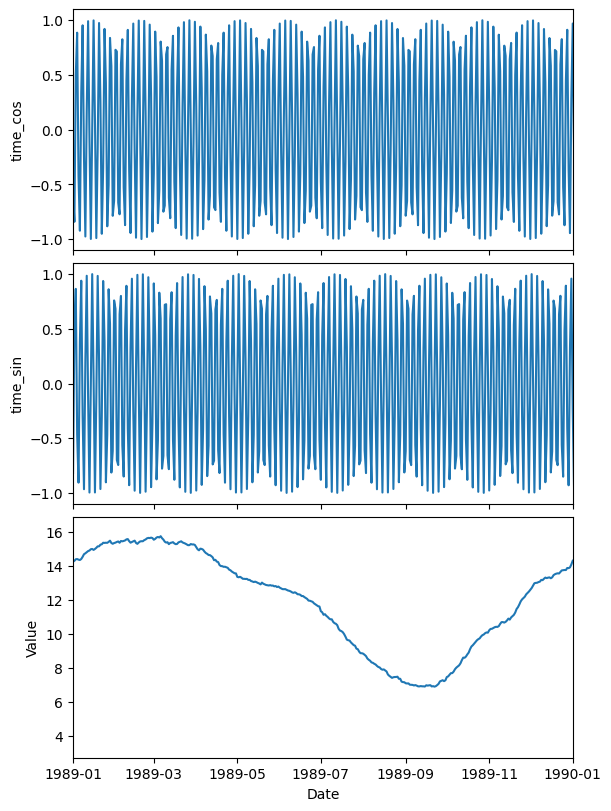

In [165]:
fig, ax = plt.subplots(3,1, figsize=(6,8), constrained_layout=True, sharex=True)
sns.lineplot(df_processed, x = 'Date', y = 'time_cos', ax=ax[0])
sns.lineplot(df_processed, x = 'Date', y = 'time_sin', ax=ax[1])
sns.lineplot(df_processed, x = 'Date', y = 'Value', ax=ax[2])
ax[0].set_xlim([start_date, start_date + timedelta(days=365)])
plt.show()

## FFT

In [167]:
from scipy.fft import fft, ifft, fftfreq

In [168]:
fft_seaice = fft(df_processed.Value)

In [176]:
len(fft_seaice)

13165

In [177]:
len(df_processed)

13165

In [179]:
sampling_rate = 1/86400 # Hz

In [178]:
freq_values_scipy = fftfreq(len(fft_seaice), d = 86400)
freq_values_scipy

array([ 0.00000000e+00,  8.79154886e-10,  1.75830977e-09, ...,
       -2.63746466e-09, -1.75830977e-09, -8.79154886e-10], shape=(13165,))

In [181]:
freq_values_scipy.max()

np.float64(5.786597459594041e-06)

In [183]:
freq_values_scipy.min()

np.float64(-5.786597459594041e-06)

In [184]:
freq_values = np.arange(-len(fft_seaice)//2, len(fft_seaice)//2)/len(fft_seaice)*sampling_rate
freq_values

array([-5.78747661e-06, -5.78659746e-06, -5.78571830e-06, ...,
        5.78395999e-06,  5.78483915e-06,  5.78571830e-06], shape=(13165,))

In [247]:
freq_in_periods = 1/freq_values_scipy*sampling_rate
freq_in_periods

/tmp/ipykernel_61488/3666623109.py:1: RuntimeWarning: divide by zero encountered in divide
  freq_in_periods = 1/freq_values_scipy*sampling_rate


array([            inf,  13165.        ,   6582.5       , ...,
        -4388.33333333,  -6582.5       , -13165.        ], shape=(13165,))

## FFT plot

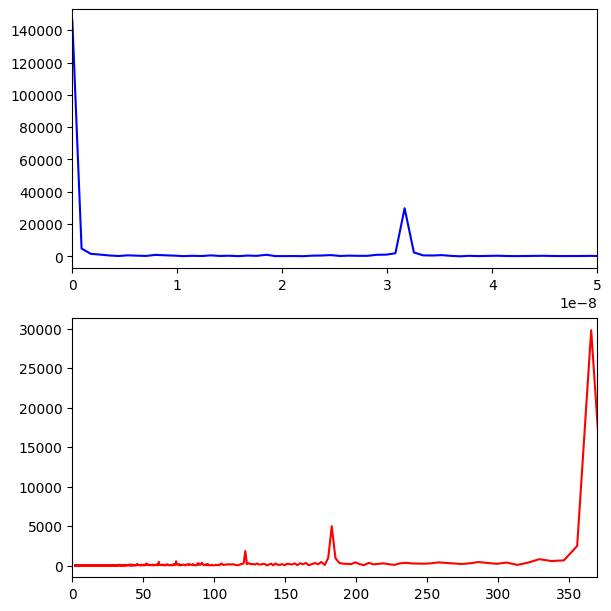

In [254]:
fig, ax = plt.subplots(2,1, figsize=(6, 6), constrained_layout=True)

ax[0].plot(freq_values_scipy[: len(fft_seaice)//2], np.abs(fft_seaice[: len(fft_seaice)//2]), 'b', label="Amplitude")
ax[1].plot(freq_in_periods[:len(fft_seaice)//2], np.abs(fft_seaice[:len(fft_seaice)//2]), 'r', label="Amplitude")
ax[0].set_xlim([0, 5*10**(-8)])
ax[1].set_xlim([0, 370])
# ax[1].set_ylim([0,50000])
plt.show()


### NOTE

* frequencies above 365 can be deleted

## TOP 3 frequencies

In [264]:
freq_in_periods_onehalf = freq_in_periods[:len(fft_seaice)//2].copy()

In [266]:
freq_in_periods_onehalf

array([           inf, 1.31650000e+04, 6.58250000e+03, ...,
       2.00106399e+00, 2.00075988e+00, 2.00045586e+00], shape=(6582,))

In [267]:
freq_in_periods

array([            inf,  13165.        ,   6582.5       , ...,
        -4388.33333333,  -6582.5       , -13165.        ], shape=(13165,))

In [227]:
sorted_indices = freq_in_periods_onehalf.argsort()
sorted_indices

array([   0,    1,    2, ..., 6579, 6580, 6581], shape=(6582,))

In [229]:
np.argsort(freq_in_periods_onehalf)

array([   0,    1,    2, ..., 6579, 6580, 6581], shape=(6582,))

In [279]:
fft_values_scipy_onehalf = fft_seaice[:len(fft_seaice)//2].copy()

In [320]:
freq_in_periods_onehalf[(freq_in_periods_onehalf < 370) & (freq_in_periods_onehalf > 200)]

array([365.69444444, 355.81081081, 346.44736842, 337.56410256,
       329.125     , 321.09756098, 313.45238095, 306.1627907 ,
       299.20454545, 292.55555556, 286.19565217, 280.10638298,
       274.27083333, 268.67346939, 263.3       , 258.1372549 ,
       253.17307692, 248.39622642, 243.7962963 , 239.36363636,
       235.08928571, 230.96491228, 226.98275862, 223.13559322,
       219.41666667, 215.81967213, 212.33870968, 208.96825397,
       205.703125  , 202.53846154])

### abs(fft_values_scipy_onehalf[(freq_in_periods_onehalf < 370) & (freq_in_periods_onehalf > 100)])

In [281]:
abs(fft_values_scipy_onehalf[1:]).argmax()

np.int64(35)

In [273]:
freq_in_periods_onehalf[35+1]

np.float64(365.69444444444446)

In [274]:
freq_in_periods[:len(fft_seaice)//2][35+1]

np.float64(365.69444444444446)

In [275]:
freq_values_scipy_onehalf = freq_values_scipy[: len(fft_seaice)//2].copy()

In [276]:
freq_values_scipy_onehalf[35+1]

np.float64(3.1649575895682995e-08)

In [284]:
abs(fft_values_scipy_onehalf[1:]).argsort()[-5:]

array([34, 36,  0, 71, 35])

In [285]:
abs(fft_values_scipy_onehalf[1:])[abs(fft_values_scipy_onehalf[1:]).argsort()[-5:]]

array([ 1945.12064507,  2476.51723232,  4871.69435037,  4977.46891079,
       29817.77003393])

In [287]:
freq_in_periods_onehalf[abs(fft_values_scipy_onehalf[1:]).argsort()[-5:]]

array([387.20588235, 365.69444444,          inf, 185.42253521,
       376.14285714])

In [288]:
freq_in_periods_onehalf[(freq_in_periods_onehalf < 200) & (freq_in_periods_onehalf > 150)]

array([199.46969697, 196.49253731, 193.60294118, 190.79710145,
       188.07142857, 185.42253521, 182.84722222, 180.34246575,
       177.90540541, 175.53333333, 173.22368421, 170.97402597,
       168.78205128, 166.64556962, 164.5625    , 162.5308642 ,
       160.54878049, 158.61445783, 156.72619048, 154.88235294,
       153.08139535, 151.32183908])

In [289]:
abs(fft_values_scipy_onehalf[(freq_in_periods_onehalf < 200) & (freq_in_periods_onehalf > 150)])

array([ 402.69962164,  172.96652021,  204.2006806 ,  237.19091387,
        330.60713202,  947.80799644, 4977.46891079,  970.8682241 ,
         58.94963786,  447.08319134,  164.9406382 ,  308.04062106,
        178.57347081,   28.58684952,  319.98664494,  159.57103942,
        288.83131387,   43.51711245,  277.72570844,  121.02082522,
        181.00309957,  219.54492203])

In [304]:
abs(fft_values_scipy_onehalf[(freq_in_periods_onehalf < 200) & (freq_in_periods_onehalf > 150)]).argmax()

np.int64(6)

In [305]:
freq_in_periods_onehalf[(freq_in_periods_onehalf < 200) & (freq_in_periods_onehalf > 150)][_]

np.float64(182.84722222222223)

In [306]:
np.argwhere(freq_in_periods_onehalf == _)[0]

array([72])

In [307]:
abs(fft_values_scipy_onehalf)[_]

array([4977.46891079])

In [314]:
abs(fft_values_scipy_onehalf[(freq_in_periods_onehalf < 150) & (freq_in_periods_onehalf > 100)]).argmax()

np.int64(20)

In [315]:
freq_in_periods_onehalf[(freq_in_periods_onehalf < 150) & (freq_in_periods_onehalf > 100)][_]

np.float64(121.89814814814814)

In [316]:
np.argwhere(freq_in_periods_onehalf == _)[0]

array([108])

In [317]:
abs(fft_values_scipy_onehalf)[_]

array([1841.67558815])

In [322]:
abs(fft_values_scipy_onehalf[(freq_in_periods_onehalf < 370) & (freq_in_periods_onehalf > 200)]).argmax()

np.int64(0)

In [323]:
freq_in_periods_onehalf[(freq_in_periods_onehalf < 370) & (freq_in_periods_onehalf > 200)][_]

np.float64(365.69444444444446)

In [324]:
np.argwhere(freq_in_periods_onehalf == _)[0]

array([36])

In [325]:
abs(fft_values_scipy_onehalf)[_]

array([29817.77003393])